In [1]:
#task 4:SPAM SMS DETECTION

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [10]:
df = pd.read_csv(
    r"C:\Users\Lenovo\Downloads\SPAMSMSDETECTION\spam.csv",
    encoding="latin-1"
)

df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

df['label'].value_counts()


label
0    4825
1     747
Name: count, dtype: int64

In [12]:
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=0,
    stratify=y
)


In [13]:
count_vectorizer = CountVectorizer(
    lowercase=True,
    stop_words='english',
    max_features=3000
)

X_train_vec = count_vectorizer.fit_transform(X_train)
X_test_vec  = count_vectorizer.transform(X_test)


In [14]:
svm_model = LinearSVC(class_weight='balanced')

svm_model.fit(X_train_vec, y_train)


,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,None


In [15]:
y_pred = svm_model.predict(X_test_vec)


In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9770279971284996

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1206
           1       0.95      0.88      0.91       187

    accuracy                           0.98      1393
   macro avg       0.96      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393



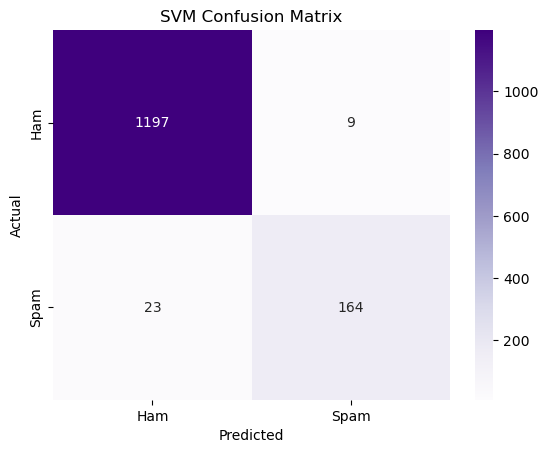

In [17]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Purples',
    xticklabels=['Ham', 'Spam'],
    yticklabels=['Ham', 'Spam']
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()


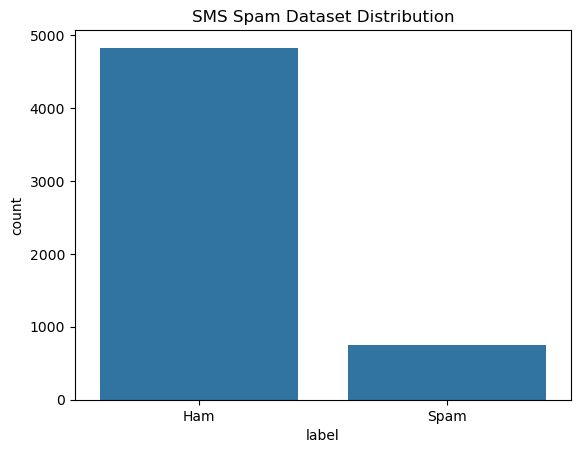

In [18]:
sns.countplot(x=df['label'])
plt.xticks([0,1], ['Ham', 'Spam'])
plt.title("SMS Spam Dataset Distribution")
plt.show()


In [19]:
sample_sms = ["Congratulations! You have won a free gift card"]

sample_vec = count_vectorizer.transform(sample_sms)
prediction = svm_model.predict(sample_vec)

print("Prediction:", "Spam" if prediction[0] == 1 else "Ham")


Prediction: Spam


In [20]:
#Task 4 Report

In [ ]:
#  SMS Spam Detection  
### CodeSoft Machine Learning Task

## Introduction
SMS Spam Detection is a text classification task where a machine learning model identifies whether a message is spam or legitimate (ham) using Natural Language Processing techniques.

## Objective
- Classify SMS messages as spam or ham  
- Convert text data into numerical features  
- Train and evaluate a machine learning model  

## Dataset Description
The dataset contains two main columns:
- **label** – Message type (ham or spam)  
- **message** – SMS text content  

## Methodology
1. Load and clean the dataset  
2. Encode target labels  
3. Convert text into numerical features using Count Vectorization  
4. Train a classification model  
5. Evaluate performance using standard metrics  

## Model Used
A **Linear Support Vector Machine (Linear SVC)** is used because it performs well for text classification problems with high-dimensional data.

## Evaluation
The model is evaluated using:
- Accuracy score  
- Classification report  
- Confusion matrix  

## Result
The model successfully distinguishes spam messages from legitimate messages with high accuracy.

## Conclusion
This project demonstrates that machine learning combined with NLP techniques can effectively detect spam messages and filter unwanted SMS content.

## Future Scope
- Use TF-IDF or word embeddings  
- Apply deep learning models  
- Deploy as a real-time spam filtering system  
